In [1]:
import pandas as pd
import matplotlib.pyplot as pyp
import numpy as np
import seaborn as sns
import plotly as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=pd.read_excel('C:/Users/ARNAB MAITY/Desktop/ML learning/kolkata data modified - Copy.xlsx', sheet_name="Export")
raw_df=pd.DataFrame(data)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         366 non-null    datetime64[ns]
 1   day          366 non-null    int64         
 2   month        366 non-null    int64         
 3   year         366 non-null    int64         
 4   Day of year  366 non-null    int64         
 5   tavg         366 non-null    float64       
 6   tmin         366 non-null    float64       
 7   tmax         366 non-null    float64       
 8   prcp         362 non-null    float64       
 9   snow         0 non-null      float64       
 10  wdir         0 non-null      float64       
 11  wspd         366 non-null    float64       
 12  wpgt         0 non-null      float64       
 13  pres         366 non-null    float64       
 14  Day_sin      366 non-null    float64       
 15  Day_cos      366 non-null    float64       
 16  Month_si

In [5]:
raw_df.describe()

,date,day,month,year,Day of year,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,Day_sin,Day_cos,Month_sin,Month_cos
count,366,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000,362.000000,0.0,0.0,366.000000,0.0,366.000000,366.000000,366.000000,3.660000e+02,3.660000e+02
mean,2024-07-01 12:00:00.000000256,15.756831,6.513661,2024.0,183.500000,27.148907,23.263388,31.966120,5.099171,NaN,NaN,8.009016,NaN,1007.811202,0.000031,0.002049,-3.000208e-03,-1.000069e-03
min,2024-01-01 00:00:00,1.000000,1.000000,2024.0,1.000000,13.800000,10.000000,19.000000,0.000000,NaN,NaN,1.700000,NaN,986.400000,-0.999999,-0.999979,-1.000000e+00,-1.000000e+00
25%,2024-04-01 06:00:00,8.000000,4.000000,2024.0,92.250000,23.525000,19.000000,28.400000,0.000000,NaN,NaN,5.425000,NaN,1002.800000,-0.703295,-0.705193,-7.745191e-01,-7.745191e-01
50%,2024-07-01 12:00:00,16.000000,7.000000,2024.0,183.500000,28.400000,25.050000,32.550000,0.000000,NaN,NaN,7.500000,NaN,1008.650000,0.003225,0.003225,-2.449213e-16,-6.123032e-17
75%,2024-09-30 18:00:00,23.000000,9.750000,2024.0,274.750000,30.475000,27.400000,35.200000,3.625000,NaN,NaN,9.800000,NaN,1013.175000,0.704815,0.709752,5.000000e-01,7.745191e-01
max,2024-12-31 00:00:00,31.000000,12.000000,2024.0,366.000000,36.400000,32.000000,44.000000,95.000000,NaN,NaN,28.100000,NaN,1019.400000,0.999986,0.999991,1.000000e+00,1.000000e+00
std,NaN,8.823592,3.455958,0.0,105.799338,4.780914,5.224555,4.741706,12.890477,NaN,NaN,3.639427,NaN,6.479892,0.707349,0.708797,7.071004e-01,7.090407e-01


In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imputer=SimpleImputer(strategy='median')

In [8]:
raw_df

,date,day,month,year,Day of year,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,Day_sin,Day_cos,Month_sin,Month_cos
0,2024-01-01,1,1,2024,1,17.9,13.0,24.2,0.0,NaN,NaN,6.3,NaN,1015.9,0.017202,0.999852,5.000000e-01,0.866025
1,2024-01-02,2,1,2024,2,16.2,13.0,23.3,0.0,NaN,NaN,8.1,NaN,1016.0,0.034398,0.999408,5.000000e-01,0.866025
2,2024-01-03,3,1,2024,3,18.2,13.0,25.5,0.0,NaN,NaN,7.4,NaN,1015.3,0.051584,0.998669,5.000000e-01,0.866025
3,2024-01-04,4,1,2024,4,18.9,13.0,25.7,0.0,NaN,NaN,3.4,NaN,1015.3,0.068755,0.997634,5.000000e-01,0.866025
4,2024-01-05,5,1,2024,5,19.1,15.0,25.6,0.0,NaN,NaN,4.3,NaN,1015.9,0.085906,0.996303,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,27,12,2024,362,21.6,17.0,27.3,0.0,NaN,NaN,8.3,NaN,1018.1,-0.055879,0.998438,-2.449213e-16,1.000000
362,2024-12-28,28,12,2024,363,21.9,17.0,27.4,0.0,NaN,NaN,4.8,NaN,1016.6,-0.038696,0.999251,-2.449213e-16,1.000000
363,2024-12-29,29,12,2024,364,22.7,15.6,28.2,0.0,NaN,NaN,4.7,NaN,1015.9,-0.021501,0.999769,-2.449213e-16,1.000000
364,2024-12-30,30,12,2024,365,21.4,18.0,26.7,0.0,NaN,NaN,7.4,NaN,1016.6,-0.004301,0.999991,-2.449213e-16,1.000000


In [9]:
imputer.fit(raw_df[['prcp']])  # Use quotes around column name 'prcp' to specify it as a string

SimpleImputer(strategy='median')

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         366 non-null    datetime64[ns]
 1   day          366 non-null    int64         
 2   month        366 non-null    int64         
 3   year         366 non-null    int64         
 4   Day of year  366 non-null    int64         
 5   tavg         366 non-null    float64       
 6   tmin         366 non-null    float64       
 7   tmax         366 non-null    float64       
 8   prcp         362 non-null    float64       
 9   snow         0 non-null      float64       
 10  wdir         0 non-null      float64       
 11  wspd         366 non-null    float64       
 12  wpgt         0 non-null      float64       
 13  pres         366 non-null    float64       
 14  Day_sin      366 non-null    float64       
 15  Day_cos      366 non-null    float64       
 16  Month_si

In [11]:
raw_df['temp'] = raw_df['tavg']
mask = raw_df['temp'].isna()
raw_df.loc[mask, 'temp'] = (raw_df.loc[mask, 'tmin'] + raw_df.loc[mask, 'tmax']) / 2


In [12]:
raw_df['temp_1'] = raw_df['temp'].shift(1)
raw_df['temp_2'] = raw_df['temp'].shift(2)
raw_df['temp_7'] = raw_df['temp'].shift(7)


In [13]:
raw_df['roll_3'] = raw_df['temp'].shift(1).rolling(3).mean()
raw_df['roll_7'] = raw_df['temp'].shift(1).rolling(7).mean()


In [14]:
cols_to_drop = ['temp_1', 'temp_2', 'temp_7', 'roll_3', 'roll_7']
raw_df = raw_df.dropna(subset=cols_to_drop).reset_index(drop=True)


In [15]:
print(raw_df.shape)
print(raw_df.head())


(359, 24)
        date  day  month  year  Day of year  tavg  tmin  tmax  prcp  snow  \
0 2024-01-08    8      1  2024            8  18.8  15.0  25.0   0.0   NaN   
1 2024-01-09    9      1  2024            9  18.4  14.0  24.6   0.0   NaN   
2 2024-01-10   10      1  2024           10  19.8  14.0  26.0   0.0   NaN   
3 2024-01-11   11      1  2024           11  18.2  16.0  24.5   0.0   NaN   
4 2024-01-12   12      1  2024           12  15.2  12.0  22.6   0.0   NaN   

   ...   Day_sin   Day_cos  Month_sin  Month_cos  temp  temp_1  temp_2  \
0  ...  0.137185  0.990545        0.5   0.866025  18.8    19.6    19.6   
1  ...  0.154204  0.988039        0.5   0.866025  18.4    18.8    19.6   
2  ...  0.171177  0.985240        0.5   0.866025  19.8    18.4    18.8   
3  ...  0.188099  0.982150        0.5   0.866025  18.2    19.8    18.4   
4  ...  0.204966  0.978769        0.5   0.866025  15.2    18.2    19.8   

   temp_7     roll_3     roll_7  
0    17.9  19.433333  18.500000  
1    16.2  19.

In [16]:
raw_df['prcp'] = raw_df['prcp'].fillna(method='ffill').fillna(0)


C:\Users\ARNAB MAITY\AppData\Local\Temp\ipykernel_14488\490861831.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df['prcp'] = raw_df['prcp'].fillna(method='ffill').fillna(0)


In [17]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         359 non-null    datetime64[ns]
 1   day          359 non-null    int64         
 2   month        359 non-null    int64         
 3   year         359 non-null    int64         
 4   Day of year  359 non-null    int64         
 5   tavg         359 non-null    float64       
 6   tmin         359 non-null    float64       
 7   tmax         359 non-null    float64       
 8   prcp         359 non-null    float64       
 9   snow         0 non-null      float64       
 10  wdir         0 non-null      float64       
 11  wspd         359 non-null    float64       
 12  wpgt         0 non-null      float64       
 13  pres         359 non-null    float64       
 14  Day_sin      359 non-null    float64       
 15  Day_cos      359 non-null    float64       
 16  Month_si

In [18]:
features = [
    'temp_1', 'temp_2', 'temp_7',
    'roll_3', 'roll_7',
    'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'wpgt', 'pres',
    'Day_sin', 'Day_cos',
    'Month_sin', 'Month_cos'
]

inputs = raw_df[features]
target = raw_df['temp']


In [22]:
# Train: Jan-Aug (1-8)
train_df = raw_df[raw_df['month'] <= 8]

# Validation: Sept-Oct (9-10)
val_df = raw_df[(raw_df['month'] >= 9) & (raw_df['month'] <= 10)]

# Test: Nov-Dec (11-12)
test_df = raw_df[raw_df['month'] >= 11]

In [24]:
train_inputs=train_df[['temp_1', 'temp_2', 'temp_7',
    'roll_3', 'roll_7',
    'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'wpgt', 'pres',
    'Day_sin', 'Day_cos',
    'Month_sin', 'Month_cos']]

In [25]:
train_inputs

,temp_1,temp_2,temp_7,roll_3,roll_7,tmin,tmax,prcp,snow,wspd,wpgt,pres,Day_sin,Day_cos,Month_sin,Month_cos
0,19.6,19.6,17.9,19.433333,18.500000,15.0,25.0,0.0,NaN,8.2,NaN,1017.5,0.137185,0.990545,0.500000,0.866025
1,18.8,19.6,16.2,19.333333,18.628571,14.0,24.6,0.0,NaN,6.4,NaN,1016.6,0.154204,0.988039,0.500000,0.866025
2,18.4,18.8,18.2,18.933333,18.942857,14.0,26.0,0.0,NaN,1.7,NaN,1014.9,0.171177,0.985240,0.500000,0.866025
3,19.8,18.4,18.9,19.000000,19.171429,16.0,24.5,0.0,NaN,7.0,NaN,1016.4,0.188099,0.982150,0.500000,0.866025
4,18.2,19.8,19.1,18.800000,19.071429,12.0,22.6,0.0,NaN,9.0,NaN,1016.4,0.204966,0.978769,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,27.7,27.7,28.3,27.600000,28.142857,25.0,30.2,41.9,NaN,5.7,NaN,1004.7,-0.834370,-0.551205,-0.866025,-0.500000
233,27.6,27.7,29.8,27.666667,28.042857,25.8,34.0,3.0,NaN,5.3,NaN,1003.8,-0.843728,-0.536771,-0.866025,-0.500000
234,30.1,27.6,28.9,28.466667,28.085714,26.6,34.2,0.0,NaN,5.6,NaN,1002.9,-0.852837,-0.522178,-0.866025,-0.500000
235,30.3,30.1,27.2,29.333333,28.285714,26.7,35.0,0.0,NaN,6.7,NaN,1003.6,-0.861693,-0.507430,-0.866025,-0.500000


In [26]:
val_inputs=val_df[['temp_1', 'temp_2', 'temp_7',
    'roll_3', 'roll_7',
    'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'wpgt', 'pres',
    'Day_sin', 'Day_cos',
    'Month_sin', 'Month_cos']]
test_inputs=test_df[['temp_1', 'temp_2', 'temp_7',
    'roll_3', 'roll_7',
    'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'wpgt', 'pres',
    'Day_sin', 'Day_cos',
    'Month_sin', 'Month_cos']]

In [27]:
train_target=train_df['temp']
val_target=val_df['temp']
test_target=test_df['temp']

In [28]:
train_target

0      18.8
1      18.4
2      19.8
3      18.2
4      15.2
       ... 
232    27.6
233    30.1
234    30.3
235    30.5
236    30.3
Name: temp, Length: 237, dtype: float64

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [47]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                                  # custom CV split
    scoring='neg_mean_squared_error',       # regression metric
    n_jobs=-1,                              # use all CPU cores
    verbose=1
)


In [48]:
grid_search.fit(train_inputs,train_target)
print("Best parameters:", grid_search.best_params_)
print("Best CV score (Neg MSE):", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}
Best CV score (Neg MSE): -4.245703673386374


In [51]:
best_model = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400, random_state=42)

In [52]:
best_model.fit(train_inputs,train_target)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=400,
                      random_state=42)

In [53]:
best_model.score(test_inputs,test_target)

0.8427790662464378

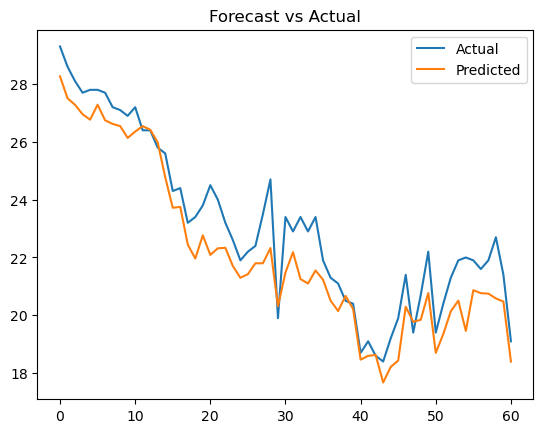

In [56]:
test_preds = best_model.predict(test_inputs)
pyp.plot(test_target.values, label="Actual")
pyp.plot(test_preds, label="Predicted")  
pyp.legend()
pyp.title("Forecast vs Actual")
pyp.show()

In [57]:
#looks decent i guess!?

In [58]:
import joblib
joblib.dump(best_model, "best_model.joblib")


['best_model.joblib']